# Spectral Analysis of Signals

[Colab:] https://drive.google.com/file/d/13Pjf31NMQFpUVPqsjrrzElLlv7HdKxH9/view?usp=drive_link

[Book func](https://drive.google.com/drive/folders/18vcEtTFuxsFom8V9ZgnRfmgFxi18YsHQ?usp=sharing)

[Book Folder](https://drive.google.com/drive/folders/1FFwVutA-jbbRQQW1k7NyjFVcLFjJOw2c?usp=sharing)


## Introduction     
**In this chapter we will analyze the spetral behavior of the signals in space, frequency and time, in order to acquire physical and mathematical insights for applied electromagnetics.**
**The signal's time variation is intrinsically linked to  time-frequency as well known. Usually, the Fourier analysis is the widely used spectral transformation to evaluate the signal's characteristics. Discrete-Time Fourier Series (DFS) are intended for periodic signals and the Discrete-Time Fourier Transform for non-periodic signals, commonly implemented by fast fourier transform (FFT) algorithms. We will analyze canonical periodic and non-periodic time signals using FFT to extract useful information for electromagnetic signal processing.** 

**However for the electronmagnetism, the time transformation are not enough, as the signal propagates throughout the space. Spectral transformation are useful tools to solve microwave and optical problems, besides to gather informations about the physics. For example the physical optics employed in 3D games, propagation models of telecomunications signals,...**

### **Definition**

**The time signals, or even from mathematics, a time series, describes the variation in time of a given property. For electromagnetism, we focus in the variation of voltages, currents, electromagnetic field's intensities in space-time, for example. We can apply spectral transformation of a space over all dimensions of the space-time.**

**The space-time signal will be defined by lower case letter, we will consider as current signal propagating only in z-dimension, at first, for example,**

$$x_{t}(t,z)=\sin{(\omega t-kz)}$$

**where $\omega=2\pi f$, being $f$ the angular frequency.** 

**The space-frequency or time-frequency domain signals will be represented by upper case Letter, for example, we will have,**

$$x_{t}(t,z)=\sin{(\omega_0 t-kz)}$$

**Applying frequency spectral transformation**

$$x_{t}(t,z) \xrightarrow{\mathscr{F_t}} X(f,z)$$ 

**Applying space spectral transformation**


$$x_{t}(t,x) \xrightarrow{\mathscr{F_k}} X(t,k)$$ 

if applied simultaneously

$$x_{t}(t,x) \xrightarrow{\mathscr{F_{t,k}}} X(f,k)$$ 




### **Space-Time Convention 2D**

[Ref] Iizuka K. "Elements of Photonics, Volume I: In Free Space and Special Media," John Wiley & Sons, Inc.,June 2022.
[Ref] Iizuka K. "Elements of Photonics, Volume II: For Fiber and Integrated Optics.," John Wiley & Sons, Inc.,June 2022.
 (Cap. 1 e o de Polarização gostei mais da explicação)
 [REF] 

https://www.ele.uva.es/~ivasan/DO/%5BBook%20-%20Opto%5D%20Elements%20of%20photonics%20(Vol%20I%20-%20Free%20space%20and%20special%20media)%20-%20Iizuka%20(Willey,%202002).pdf

**A signal propagating direction  convetion will depend on the sign of the time and space counterpart**

**- Propagation Foward, toward the positve x-direction will be represented by ( the rate of frequency variation must have the opposite sign of the rate of space-frequency variation**

$$x_{t}(t,x)=\sin{(\omega_0 t-kz)}$$


$$x_{t}(t,x)=\sin{(-\omega_0 t+kz)}$$

**- Propagation Backward, Toward the negative x-direction will be represented by ( the rate of frequency variation must have the same sign of the rate of space-frequency variation)**

$$x_{t}(t,x)=\sin{(-\omega_0 t-kz)}$$

$$x_{t}(t,x)=\sin{(\omega_0 t+kz)}$$


### **Space-Time Convention 3D**


### **Space-Time Convention 4D**


x0: -0.8993745355900732
x0: -0.8993745355900732
xf: 0.8843849599969112
t0: 0.0
t0: 0.0
tf: 4.975e-09


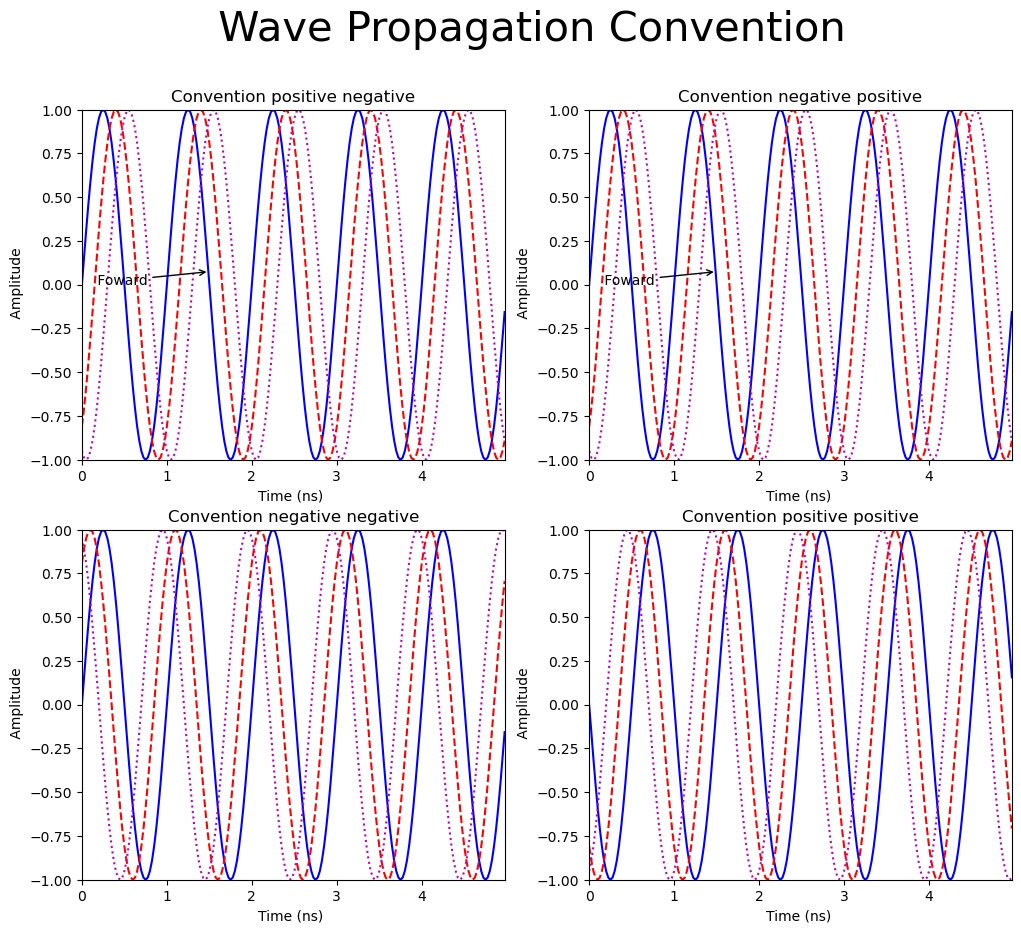

(120,)

In [1]:
#  Convention
import numpy as np
from numpy import sin, exp, cos, log10, pi,angle,sqrt,log
import pandas as pd
import matplotlib.pyplot as plt

from bookfuncs.plotfunc import plot1DTparametric,plot1DS,plot1DSparametric,S1d,plot2DTparametric
from bookfuncs.simuParams import *
from bookfuncs.simuParams import  SimuParam

import time
import warnings
warnings.filterwarnings(action='ignore')

par=SimuParam()
par.par
t=np.arange(par.par.loc['HSinP','t0'],par.par.loc['HSinP','tf'],par.par.loc['HSinP','dt'])
x=np.arange(par.par.loc['HSinP','x0'],par.par.loc['HSinP','xf'],par.par.loc['HSinP','dx'])
[X,T]=np.meshgrid(x,t) # meshgrid 2D cria uma matrix 2D com todas as possibilidade de tempo e spaço (depois criarei uma matrix 2D para o espectro frequencial)
# as linhas das matrizes representam a variaçao no tempo e as colunas variação no espaço, a referencia do tempo espaço é t0=0, x0=-5 lambda (comprimento de onda)
print("x0: {}".format(x[0]))
print("x0: {}".format(X[5,0]))
print("xf: {}".format(x[-1]))
print("t0: {}".format(t[0]))
print("t0: {}".format(T[0,5])) #
print("tf: {}".format(t[-1])) 

xt_pm=sin(2*pi*par.par.loc['HSinP','f']*T-par.par.loc['HSinP','kx']*X)

xt_mp=-sin(-2*pi*par.par.loc['HSinP','f']*T+par.par.loc['HSinP','kx']*X)

xt_mm=-sin(-2*pi*par.par.loc['HSinP','f']*T-par.par.loc['HSinP','kx']*X)

xt_pp=-sin(2*pi*par.par.loc['HSinP','f']*T+par.par.loc['HSinP','kx']*X)


#Plot Half cycle Sin Signal
fig1,axt=plt.subplots(2,2)
fig1.set_size_inches((12,10))
fig1.suptitle(' Wave Propagation Convention ', fontsize=30)   
# Estou incrementando a posição espacial, se amplitude do sinal for maior que a da posição anterior quando o sinal está crescendo e o tempo aumentando ou
# amplitunde menor que a da posição anterior quando o sinal está descrecendo  e o tempo aumentando (Foward propagation direção positiva) e vice versa
# fazer animação no futuro (escrevi merda hahahahahah é isso mesmo eu achom da um no na cabeça hahahaa)
plot2DTparametric(axt,t,(0,0,[0,t[-1]/1e-9],[-1,1],xt_pm[:,0],'Convention positive negative','b','-'),
                        (0,0,[0,t[-1]/1e-9],[-1,1],xt_pm[:,3],"Convention positive negative",'r','--'),
                        (0,0,[0,t[-1]/1e-9],[-1,1],xt_pm[:,6],"Convention positive negative",'m',':'),
                        (0,1,[0,t[-1]/1e-9],[-1,1],xt_mp[:,0],"Convention negative positive",'b','-'),
                        (0,1,[0,t[-1]/1e-9],[-1,1],xt_mp[:,3],"Convention negative positive",'r','--'),
                        (0,1,[0,t[-1]/1e-9],[-1,1],xt_mp[:,6],"Convention negative positive",'m',':'),
                        (1,0,[0,t[-1]/1e-9],[-1,1],xt_mm[:,0],"Convention negative negative",'b','-'),
                        (1,0,[0,t[-1]/1e-9],[-1,1],xt_mm[:,3],"Convention negative negative",'r','--'),
                        (1,0,[0,t[-1]/1e-9],[-1,1],xt_mm[:,6],"Convention negative negative",'m',':'),
                        (1,1,[0,t[-1]/1e-9],[-1,1],xt_pp[:,0],"Convention positive positive",'b','-'),
                        (1,1,[0,t[-1]/1e-9],[-1,1],xt_pp[:,3],"Convention positive positive",'r','--'),
                        (1,1,[0,t[-1]/1e-9],[-1,1],xt_pp[:,6],"Convention positive positive",'m',':'),
                        )
axt[0,0].annotate(" Foward", xy=(t[60]/1e-9,(x[int(par.par.loc['HSinP','Nx']/2)+5])),
                 xytext=(t[5]/1e-9, x[int(par.par.loc['HSinP','Nx']/2)] ),
                #  xycoords=(t[10], x[int(par.par.loc['HSinP','Nx']/2)] ),
                 arrowprops=dict(arrowstyle='->', color='black'))     
axt[0,1].annotate(" Foward", xy=(t[60]/1e-9,(x[int(par.par.loc['HSinP','Nx']/2)+5])),
                 xytext=(t[5]/1e-9, x[int(par.par.loc['HSinP','Nx']/2)] ),
                #  xycoords=(t[10], x[int(par.par.loc['HSinP','Nx']/2)] ),
                 arrowprops=dict(arrowstyle='->', color='black'))       
plt.show()

x.shape


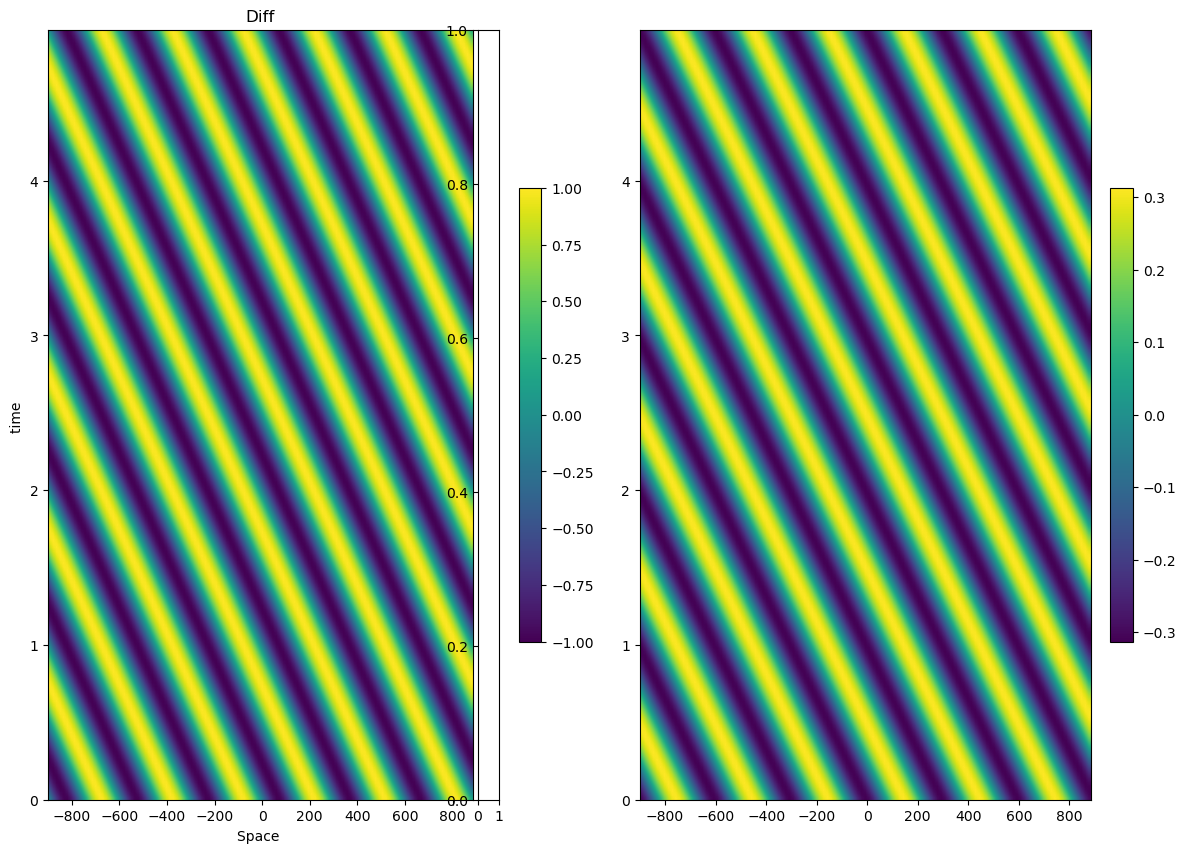

[-8.993745355900732, 8.843849599969113, 0.0, 4.975]

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

fig1,ax=plt.subplots(1,2)
fig1.set_size_inches((14,10))
# fig1.suptitle(' Wave Propagation Convention ', fontsize=30)   
# 100 time 120 space
diff_xt_mp=np.diff(xt_mp,1)
ax[0].set_title('Diff')
# pos=ax[0].imshow((xt_mp), origin='upper', interpolation='bilinear',extent =[ x.min()*10, x.max()*10,t.min()/1e-9, t.max()/1e-9])
# pos2=ax[0].imshow((xt_mp), origin='upper', interpolation='bilinear',extent =[ x.min()*10, x.max()*10,t.min()/1e-9, t.max()/1e-9])

cmap_name = 'my_list'
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # R -> G -> B
# fig, axs = plt.subplots(2, 2, figsize=(8, 9))
# fig1.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

# Create the colormap
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)
# Fewer bins will result in "coarser" colomap interpolation
im=ax[0].imshow((xt_mp), origin='upper', interpolation='bilinear',extent =[x.min()*1000, x.max()*1000, t.min()/1e-9, t.max()/1e-9],aspect='auto')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig1.colorbar(im, ax=ax[0],fraction=0.046, pad=0.04)

im2=ax[1].imshow((diff_xt_mp), origin='upper', interpolation='bilinear',extent =[x.min()*1000, x.max()*1000, t.min()/1e-9, t.max()/1e-9],aspect='auto')

fig1.colorbar(im2, ax=ax[1],fraction=0.046, pad=0.04)
extent =[ x.min()*10, x.max()*10,t.min()/1e-9, t.max()/1e-9]

    
ax[0].set_xlabel('Space ')
ax[0].set_ylabel('time ')


# extent =[ x.min()*1000, x.max()*1000,t.min()/1e-9, t.max()/1e-9]


plt.show()
extent

### 1.3 Space-Time Convention 3D

## Windows Signals 

Before go deep into the standard signals used for microwave applications. After passing throughout the spectral transformation theory, we've seen that the fourier transfom truncate the periodic signals, as well as the finite time signals, we've already been introduced to the first one, the rectangular pulse or rectangular window. The windows are very important due to the gold characteristics of the spetrum, the bandwidth, power profile, and time resolution, the complexity for the adc/dac to dectect or generate the signals.

## Definitions


- Bandwidth

It is the most desired characteristic nowdays, being all of us hungry for data throughput and capacity. It is the size of a frequency interval in a continous range of frequencies, i.e. the difference between the upper and lower frequency of the interval where the signal comply with some defined charcateristics.

- roll-off

It is the steppeness of the signal amplitude against frequency, it is used to tune bandwidth and powe distribution of signals against frequency. It's very importang because the experienced researchers and engineers can infer the spectrum from the time dynamics, or vice versa. Hence from fourier transformation properties, fast time variation infers a wider bandwidth, because only the high frequency components could well construct the signals characteristics. While slow variations, a narrow bandwdith, high frequency components wil introduce noise for the signal characteristics. The spectral transformation use orthogonal basis, in the case of fourier, complex exponetials, which are narrowband, but different orthogonal basis could be used for the intended application.


## Rectangular Windows

Rectangular windows are very important, because any finite signal fater being parsed by the fourier transformation is equivalent to be multiplied by the rectangular windows. For example, sinusoidal signals are usially analysed with fourier transformas, not fourier series, because in the real world, the signal are not infinite. So, we have a truncated version of the signusoidal signal.

$$ x(t) \xrightarrow{} x(t) \times rect(t) \xrightarrow{\mathscr{F}} X(f) \circledast sinc(f)$$

$$ x(t-t_0) \xrightarrow{\mathscr{F}} X(f) e^{-j\pi f t_0} $$

for a Guassian Signal 
$$g_{t}(t) \xrightarrow{\mathscr{F}}  G(f)=-K\frac{1}{2} \tau \sqrt{\pi } e^{-\pi^2 \tau^2 f^2}[erf(\frac{t_0}{\tau}+i \pi \tau f)-erf(\frac{t_f}{\tau}+i \pi \tau f)]$$


$$ g(t-t_0) \xrightarrow{\mathscr{F}} -K\frac{1}{2} \tau \sqrt{\pi } e^{-\pi^2 \tau^2 f^2}[erf(\frac{t_0}{\tau}+i \pi \tau f)-erf(\frac{t_f}{\tau}+i \pi \tau f)] e^{-j\pi f t_0} $$







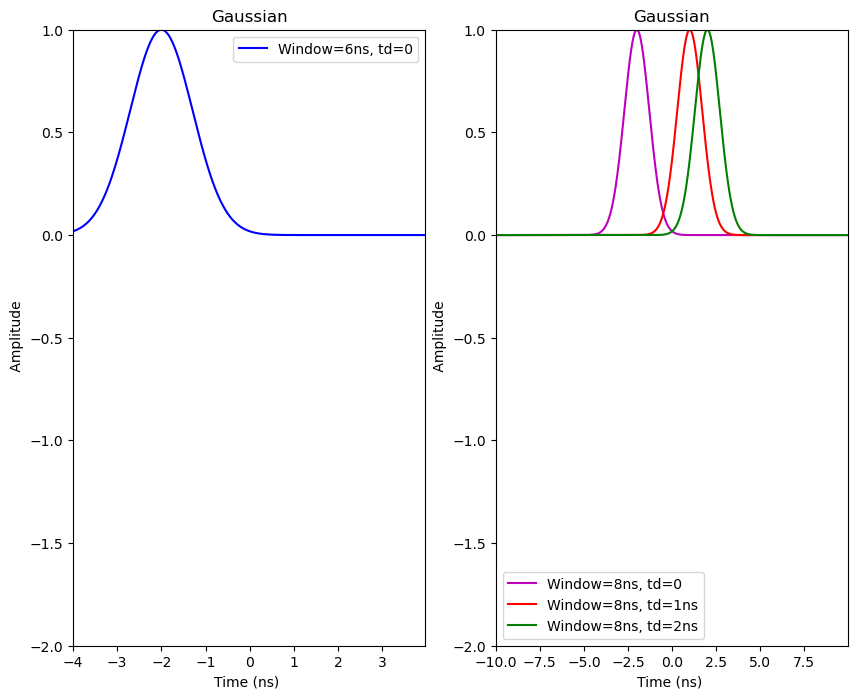

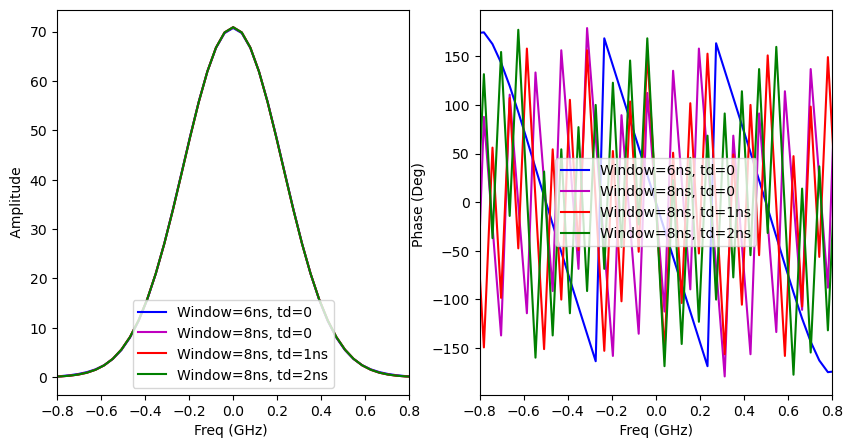

In [11]:
# Windowing 
import numpy as np
from numpy import sin, exp, cos, log10, pi,angle, cos
import pandas as pd
import matplotlib.pyplot as plt
from bookfuncs.simuParams import  SimuParam
from bookfuncs.plotfunc import plot1DTparametric,plot1DS,plot1DSparametric,S1d,plot1DSparametricUwrap
from scipy import signal
from bookfuncs.signalFunc import  gaussinaSignal

par=SimuParam()
par.par
# Time sinals
# print(t.shape)

t0=-4e-9 #ar.par.loc['Gau','t0']
tf=4e-9
t02=-10e-9 #ar.par.loc['Gau','t0']
tf2=10e-9
tau=1e-9

td=-2e-9
td=-2e-9
td3=1e-9
td4=2e-9

t=np.arange(t0,tf,par.par.loc['Gau','dt'])
t2=np.arange(t02,tf2,par.par.loc['Gau','dt'])

gt=gaussinaSignal(t,tau,td)
gt2=gaussinaSignal(t2,tau,td)
gt3=gaussinaSignal(t2,tau,td3)
gt4=gaussinaSignal(t2,tau,td4)


fig1,axt=plt.subplots(1,2)
fig1.set_size_inches((10,8))
plot1DTparametric(axt,t,(0,[t.min()/1e-9,t.max()/1e-9],[-2,1],gt,"Gaussian",'b','-'))
axt[0].legend(['Window=6ns, td=0'])

plot1DTparametric(axt,t2,(1,[t2.min()/1e-9,t2.max()/1e-9],[-2,1],gt2,"Gaussian",'m','-'))
plot1DTparametric(axt,t2,(1,[t2.min()/1e-9,t2.max()/1e-9],[-2,1],gt3,"Gaussian",'r','-'))
plot1DTparametric(axt,t2,(1,[t2.min()/1e-9,t2.max()/1e-9],[-2,1],gt4,"Gaussian",'g','-'))
axt[1].legend(['Window=8ns, td=0','Window=8ns, td=1ns','Window=8ns, td=2ns'])

Nfft=1025 # FFT points
Fs=1/(t[1]-t[0])
Fs2=1/(t2[1]-t2[0])

Gs=S1d(gt,Nfft,Fs) # Frequency Domain Signal
Gs2=S1d(gt2,Nfft,Fs2) # Frequency Domain Signal
Gs3=S1d(gt3,Nfft,Fs2) # Frequency Domain Signal
Gs4=S1d(gt4,Nfft,Fs2) # Frequency Domain Signal

fig2,axf=plt.subplots(1,2)
fig2.set_size_inches((10,5))
plot1DSparametric(axf,Gs['f'],0.8,(0,Gs['S'],'b','-'),(0,Gs2['S'],'m','-'),(0,Gs3['S'],'r','-'),(0,Gs4['S'],'g','-'))
axf[0].legend(['Window=6ns, td=0', 'Window=8ns, td=0','Window=8ns, td=1ns','Window=8ns, td=2ns'])
axf[1].legend(['Window=6ns, td=0', 'Window=8ns, td=0','Window=8ns, td=1ns','Window=8ns, td=2ns'])


 **Comments**
 If the time window or FFT window is larger, larger will be the
 It means that if we have a lot of phase variations, between -180 Degrees and 180 Degrees, and/or resonances in magnitude, it means that the signal is at the end of a wide time window

## Triangular  Windows


(320,)


Text(0.0, 30.0, '  Freq:0 Ph:0')

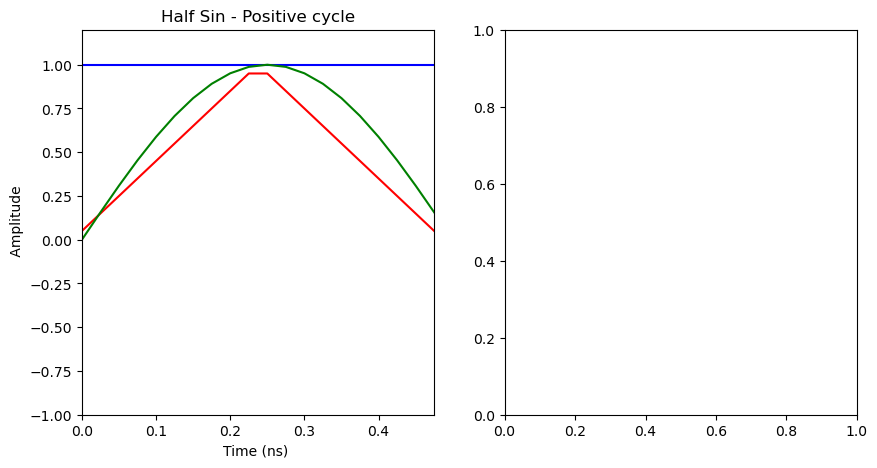

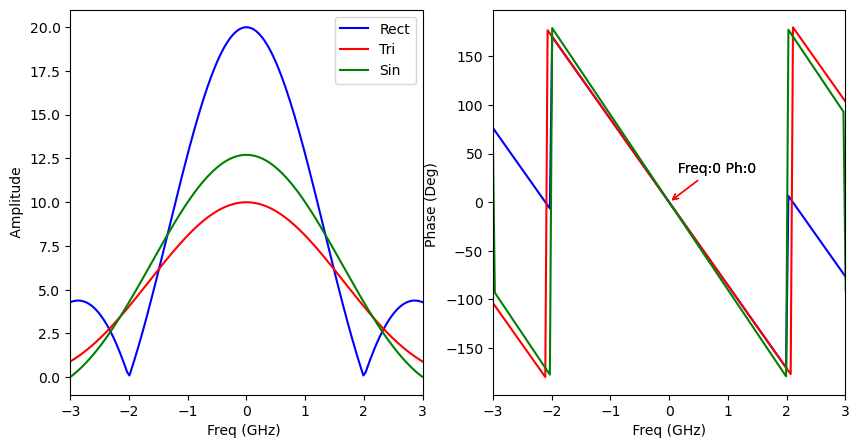

In [23]:
# Windowing 
import numpy as np
from numpy import sin, exp, cos, log10, pi,angle, cos
import pandas as pd
import matplotlib.pyplot as plt
from bookfuncs.simuParams import  SimuParam
from bookfuncs.spectralfunc import plot1DTparametric,plot1DS,plot1DSparametric,S1d,plot1DSparametricUwrap
from scipy import signal

par=SimuParam()
par.par
# Time sinals
print(t.shape)
t=np.arange(par.par.loc['HSinP','t0'],1/(2*par.par.loc['HSinP','f']),par.par.loc['HSinP','dt'])
xt_rect=np.ones(t.shape)
xt_tri=signal.windows.triang(len(t))
xt_sin=sin(2*pi*1e9*t) #np.diff(xt_0Deg)
# xt_gau=exp(-np.power((t-td)/tau,2))#np.diff(xt_0Deg)


# Fourier
Nfft=1025 # FFT points
YsRect=S1d(xt_rect,Nfft,par.par.loc['HSinP','Fs']) # Frequency Domain Signal
YsTri=S1d(xt_tri,Nfft,par.par.loc['HSinN','Fs']) # Frequency Domain Signal
YsSin=S1d(xt_sin,Nfft,par.par.loc['HSinN','Fs']) # Frequency Domain Signal

# Plot Half cycle Sin Signal
fig1,axt=plt.subplots(1,2)
fig1.set_size_inches((10,5))
plot1DTparametric(axt,t,(0,[t.min()/1e-9,t.max()/1e-9],[-1,1],xt_rect,"Half Sin - Positive cycle",'b','-'),
                       (0,[t.min()/1e-9,t.max()/1e-9],[-1,1],xt_tri,"Half Sin - Negative cycle",'r','-'))
plot1DTparametric(axt,t,(0,[t.min()/1e-9,t.max()/1e-9],[-1,1.2],xt_sin,"Half Sin - Positive cycle",'g','-'))


# Frequency Domain of 
fig2,axf=plt.subplots(1,2)
fig2.set_size_inches((10,5))
plot1DSparametric(axf,YsRect['f'],3,(0,YsRect['S'],'b','-'),(0,YsTri['S'],'r','-'),(0,YsSin['S'],'g','-'))
axf[0].legend(['Rect', 'Tri','Sin'])
# angleDiff=180/pi*(np.angle(YsDiff['S'])-np.angle(YsRect['S']))
# axf[1].plot(YsRect['f']/1e9,angleDiff)
ix=np.argmin(abs(YsRect['f']-0))
# print(ix)
axf[1].annotate("  Freq:"+str(int(YsRect['f'][ix]))+" Ph:"+str(int(180/pi*np.angle(YsRect['S'][ix]))), xy=(YsRect['f'][ix], 180/pi*np.angle(YsRect['S'][ix])),
                 xytext=(YsRect['f'][ix], 180/pi*np.angle(YsRect['S'][ix])+30),arrowprops=dict(arrowstyle='->', color='red'))

axf[1].annotate("  Freq:"+str(int(YsTri['f'][ix]))+" Ph:"+str(int(180/pi*np.angle(YsTri['S'][ix]))), xy=(YsTri['f'][ix], 180/pi*np.angle(YsTri['S'][ix])),
                 xytext=(YsTri['f'][ix], 180/pi*np.angle(YsTri['S'][ix])+30),arrowprops=dict(arrowstyle='->', color='red'))







## Sinusoidal Signals
### Half Cycle Sin

**The Half Cycle sinosoidal will be the base signal to analyse the Time/Freq spectrum, as the sinusoidal are commonly employed to analyse the frequency response of the microwave circuits, due to the narrow bandwidth, it easier to assess the characteristics for a single frequency.** 

**If we have two half cycle sinusoidal signals with opposite phase as found below,**

$$x_{t}^{+}(t,x)=\sin{(\omega_0 t-k_0x)}$$

$$x_{t}^{-}(t,x)=-\sin{(\omega_0 t-k_0x)}$$

**Applying fourier Transform**

$$x_{t}^{+}(t) \xrightarrow{\mathscr{F}}  X_{s}^{+}(f)=X_{s}(f)$$ 

$$x_{t}^{-}(t) \xrightarrow{\mathscr{F}}  X_{s}^{-}(f)=X_{s}(f)e^{i\pi}$$ 



$$x_{t}^{+}(t) \xrightarrow{\mathscr{F}}  X_{s}^{+}(f)= \int_{0}^{t_0/2}\sin{(2\pi f_0 t)} e^{-i 2\pi f t} dt$$ 

$$X_{s}^{+}(f)=\int_{0}^{t_0/2} \frac{e^{i 2\pi f_0 t}+e^{-i 2\pi f_0 t}}{2i} e^{-i 2\pi f t} dt$$ 

$$X_{s}^{+}(f)= \int_{0}^{t_0/2} \frac{e^{i 2\pi t(f_0-f)}}{2i}  dt+
                \int_{0}^{t_0/2} \frac{e^{-i 2\pi t(f_0+f)}}{2i}dt$$ 


$$X_{s}^{+}(f)= \frac{e^{i 2\pi t (f_0-f)}}{(i 2\pi (f_0-f))2i}  \biggl|_{0}^{t_0/2}
                + \frac{e^{-i 2\pi t(f_0+f)}}{(-i 2\pi (f_0+f))2i} \biggl|_{0}^{t_0/2}$$ 


being $t_0=1/f_0$


$$X_{s}^{+}(f)= \frac{e^{i 2\pi \frac{1}{2f_0} (f_0-f)}}{(i 2\pi (f_0-f))2i}  -\frac{1}{(i 2\pi (f_0-f))2i}
                + \frac{e^{-i 2\pi t(f_0+f)}}{(-i 2\pi (f_0+f))2i} \biggl|_{0}^{t_0/2}$$ 





**The shape of the half cycle signals resemble a gaussian pulse (?) in frequency domain, we se that the amplitude is centered in zero frequency, even if the carrier frequency is 1 GHz. Insofar as two identical signals with opposite signals are summed, it nulls each other. In frequency domain, it is explained by the phase inversion (phase difference of 180 Degrees) for all frequency components as shown by the deduction above and the phase plots below.**



19

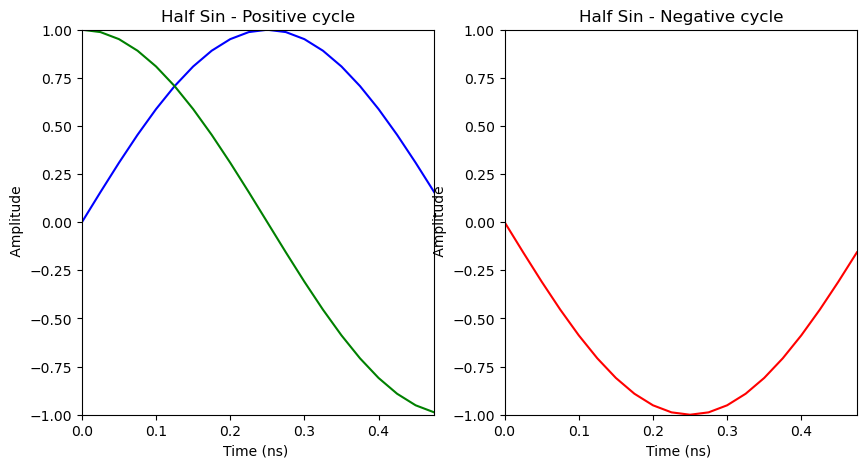

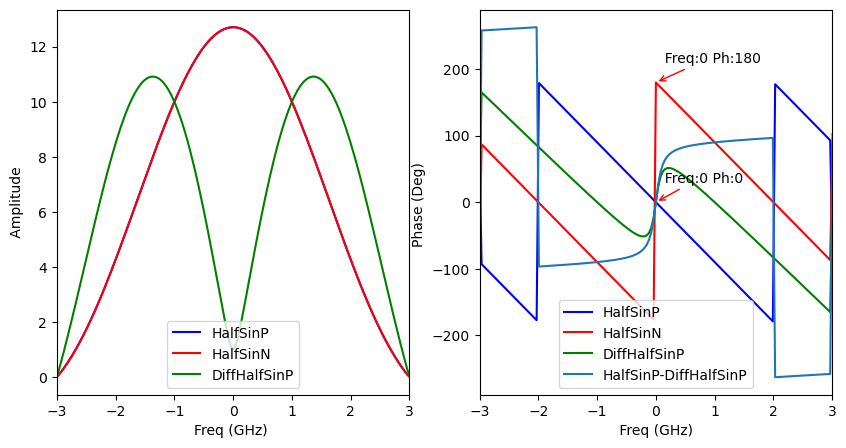

In [17]:
# HALF SIN CODE
import numpy as np
from numpy import sin, exp, cos, log10, pi,angle, cos
import pandas as pd
import matplotlib.pyplot as plt
from bookfuncs.simuParams import  SimuParam
from bookfuncs.plotfunc import plot1DTparametric,plot1DS,plot1DSparametric,S1d,plot1DSparametricUwrap

par=SimuParam()
par.par
# Time sinals
t=np.arange(par.par.loc['HSinP','t0'],1/(2*par.par.loc['HSinP','f']),par.par.loc['HSinP','dt'])
xt_0Deg=sin(2*pi*1e9*t)
xt_180Deg=-sin(2*pi*1e9*t)
xt_Diff=cos(2*pi*1e9*t) #np.diff(xt_0Deg)


# Fourier
Nfft=1025 # FFT points
Ys0Deg=S1d(xt_0Deg,Nfft,par.par.loc['HSinP','Fs']) # Frequency Domain Signal
Ys180Deg=S1d(xt_180Deg,Nfft,par.par.loc['HSinN','Fs']) # Frequency Domain Signal
YsDiff=S1d(xt_Diff,Nfft,par.par.loc['HSinN','Fs']) # Frequency Domain Signal

# Plot Half cycle Sin Signal
fig1,axt=plt.subplots(1,2)
fig1.set_size_inches((10,5))
plot1DTparametric(axt,t,(0,[t.min()/1e-9,t.max()/1e-9],[-1,1],xt_0Deg,"Half Sin - Positive cycle",'b','-'),
                       (1,[t.min()/1e-9,t.max()/1e-9],[-1,1],xt_180Deg,"Half Sin - Negative cycle",'r','-'))
plot1DTparametric(axt,t,(0,[t.min()/1e-9,t.max()/1e-9],[-1,1],xt_Diff,"Half Sin - Positive cycle",'g','-'))


# Frequency Domain of 
fig2,axf=plt.subplots(1,2)
fig2.set_size_inches((10,5))
plot1DSparametric(axf,Ys0Deg['f'],3,(0,Ys0Deg['S'],'b','-'),(0,Ys180Deg['S'],'r','-'),(0,YsDiff['S'],'g','-'))
angleDiff=180/pi*(np.angle(YsDiff['S'])-np.angle(Ys0Deg['S']))
axf[1].plot(Ys0Deg['f']/1e9,angleDiff)
axf[0].legend(['HalfSinP', 'HalfSinN','DiffHalfSinP'])
axf[1].legend(['HalfSinP', 'HalfSinN','DiffHalfSinP','HalfSinP-DiffHalfSinP'])

ix=np.argmin(abs(Ys0Deg['f']-0))
# print(ix)
axf[1].annotate("  Freq:"+str(int(Ys0Deg['f'][ix]))+" Ph:"+str(int(180/pi*np.angle(Ys0Deg['S'][ix]))), xy=(Ys0Deg['f'][ix], 180/pi*np.angle(Ys0Deg['S'][ix])),
                 xytext=(Ys0Deg['f'][ix], 180/pi*np.angle(Ys0Deg['S'][ix])+30),arrowprops=dict(arrowstyle='->', color='red'))

axf[1].annotate("  Freq:"+str(int(Ys180Deg['f'][ix]))+" Ph:"+str(int(180/pi*np.angle(Ys180Deg['S'][ix]))), xy=(Ys180Deg['f'][ix], 180/pi*np.angle(Ys180Deg['S'][ix])),
                 xytext=(Ys180Deg['f'][ix], 180/pi*np.angle(Ys180Deg['S'][ix])+30),arrowprops=dict(arrowstyle='->', color='red'))

len(t[:-1])



### 3.2 One Cycle Sin

**Now we want to create the one cycle sin using the half signals. In order to achieve it, we gonna translate (delay) the negative half cycle by half period $t_0/2$**

$$x_{t}^{+}(t)=\sin{(2\pi f_0  t)}$$

$$x_{t}^{-}(t-t_0/2)=-\sin{(2\pi f_0 (t-t_0/2))}$$

**Adding both**

$$y_{t}=x_{t}^{+}(t)+x_{t}^{-}(t-t_0/2)=\sin{(2\pi f_0  t)}-\sin{(\omega_0 (t-t_0/2))}$$


**Applying fourier Transform and fourier transform properties of time shifting**

$$y_{t}(t) \xrightarrow{\mathscr{F}}  Y_{s}(f)=X_{s}(f)+X_{s}(f)e^{i\pi}e^{i\pi f t_0/2}$$ 

$$y_{t}(t) \xrightarrow{\mathscr{F}}  Y_{s}(f)=X_{s}(f)(1+e^{i\pi (1+f t_0/2)})$$ 


**So we can note now, that independently of the signal shape, in this case a half sin, but for any arbitrary signal, if we add the arbitrary signal with its version out of phase and  time shifted one period, for the half sin, half period of one cycle, we add a null to the amplitude at the zero frequency. It's the fundamentals of the generation of the alternating current/voltages signals. A direct current signal usually has no alternation of positive and negative amplitude.**





512


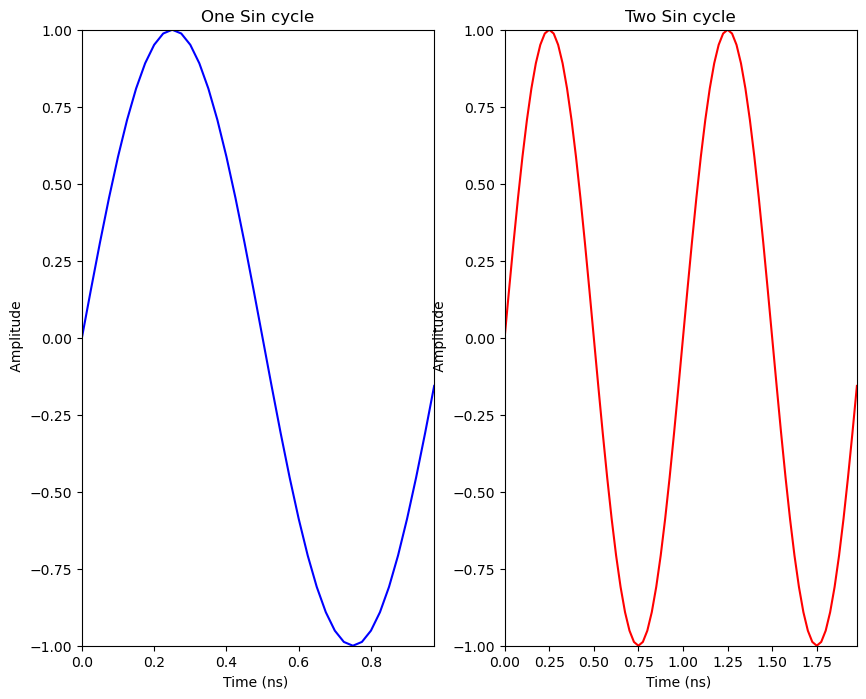

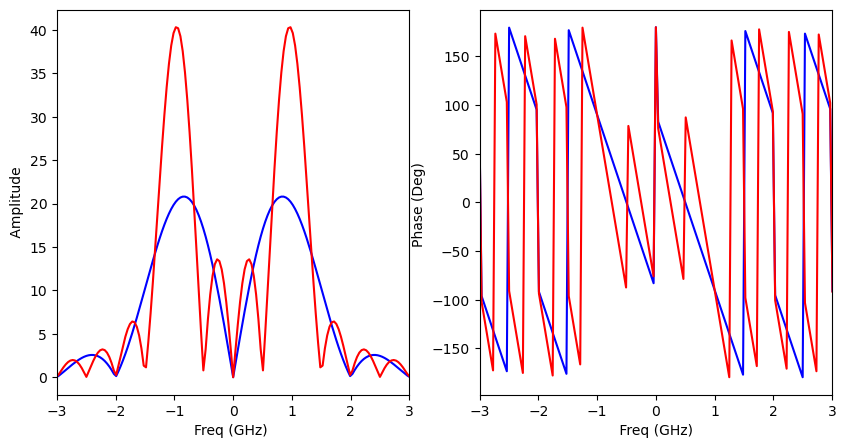

In [13]:
# One Cycle
import numpy as np
from numpy import sin, exp, cos, log10, pi,angle
import pandas as pd
import matplotlib.pyplot as plt
from bookfuncs.simuParams import  SimuParam
from bookfuncs.plotfunc import plot1DTparametric,plot1DS,plot1DSparametric,S1d,plot2DTparametric,plot1DSparametricUwrap

par=SimuParam()
par.par
# Time sinals
tf=1/(par.par.loc['HSinP','f'])
tf2=2/(par.par.loc['HSinP','f']) # 2 ou N Periodos

t=np.arange(par.par.loc['HSinP','t0'],tf,par.par.loc['HSinP','dt'])
t2=np.arange(par.par.loc['HSinP','t0'],tf2,par.par.loc['HSinP','dt'])

xt_1P=sin(2*pi*1e9*t)
xt_NP=sin(2*pi*1e9*t2)

# Fourier
Nfft=1025 # FFT points
Ys1P=S1d(xt_1P,Nfft,par.par.loc['HSinP','Fs']) # Frequency Domain Signal
YsNP=S1d(xt_NP,Nfft,par.par.loc['HSinN','Fs']) # Frequency Domain Signal

# Plot Half cycle Sin Signal
fig1,axt=plt.subplots(1,2)
fig1.set_size_inches((10,8))
plot1DTparametric(axt,t,(0,[t.min()/1e-9,t.max()/1e-9],[-1,1],xt_1P,"One Sin cycle",'b','-'))
plot1DTparametric(axt,t2,(1,[t2.min()/1e-9,t2.max()/1e-9],[-1,1],xt_NP,"Two Sin cycle",'r','-'))

# Frequency Domain of 
fig2,axf=plt.subplots(1,2)
fig2.set_size_inches((10,5))
plot1DSparametric(axf,Ys1P['f'],3,(0,Ys1P['S'],'b','-'),(0,YsNP['S'],'r','-'))
ix=np.argmin(abs(Ys1P['f']-0))
print(ix)
# axf[1].annotate("  Freq:"+str(int(Ys1P['f'][ix]))+" Ph:"+str(int(180/pi*np.angle(Ys1P['S'][ix]))), xy=(Ys1P['f'][ix], 180/pi*np.angle(Ys1P['S'][ix])),
#                  xytext=(Ys1P['f'][ix], 180/pi*np.angle(Ys1P['S'][ix])+30),arrowprops=dict(arrowstyle='->', color='red'))

# axf[1].annotate("  Freq:"+str(int(YsNP['f'][ix]))+" Ph:"+str(int(180/pi*np.angle(YsNP['S'][ix]))), xy=(YsNP['f'][ix], 180/pi*np.angle(YsNP['S'][ix])),
#                  xytext=(YsNP['f'][ix], 180/pi*np.angle(YsNP['S'][ix])+30),arrowprops=dict(arrowstyle='->', color='red'))



# fig2,axf=plt.subplots(1,3)
# fig2.set_size_inches((10,5))


plt.show()


### 3.3 Infinite Cycle Sin

**Now we want to create the infinite cycle of a sin using the positive half signal$**
$$x_{t}^{+}(t)=\sin{(2\pi f_0  t)}$$


In order to create the infinite sinusoidal function, infinite copies of $x_t$  are added at the left/right side lagged  $\frac{nt_0}{2}$  for $n=±1,2,3…$, presenting alternating phase inversion, as in the following,

<!-- $$ (-1)^n x_{t}^{+}(t \pm nt_0/2)= (-1)^n\sin{(2\pi f_0 (t\pm nt_0/2))}$$ -->

$$y_{t}=\sum_{n=-1}^{-\infty}(-1)^{-n} x_{t}^{+}(t-n t_0/2)+  x_{t}^{+}(t)   +\sum_{n=1}^{\infty}(-1)^n x_{t}^{+}(t-nt_0/2)$$

$$y_{t}=\sum_{n=1}^{\infty}(-1)^{-n} x_{t}^{+}(t+n t_0/2) +  x_{t}^{+}(t) + \sum_{n=1}^{\infty}(-1)^n x_{t}^{+}(t-nt_0/2)$$

Applying fourier Transform

$$y_{t}=\sum_{n=1}^{\infty}(-1)^{-n} X_{f}e^{i\omega t_0/2}+  x_{t}^{+}(t) + \sum_{n=1}^{\infty}(-1)^n x_{t}^{+}(t-nt_0/2)$$







## Gaussian Signals
**The Gaussian Signals are usually used in microwave engineering due to its well defined spectrum and wide bandwidth, providing thus a better time-frequency resolution to resolve electromagnetic problems.**

$$g_{t}(t)=K e^{-(t/\tau)^2}$$

**Applying Fourier Transform**

$$g_{t}(t) \xrightarrow{\mathscr{F}} G(f)$$

$$ G(f)=\int_{t_0}^{t_f} K e^{-(t/\tau)^2} e^{-i 2 \pi f t}dt$$

$$ G(f)=\int_{t_0}^{t_f} K e^{-(t/\tau)^2} (\cos{ (i 2 \pi f t)}+i\sin{ (i2 \pi f t)})dt$$

$$ G(f)=K\int_{t_0}^{t_f}  e^{-(t/\tau)^2} \cos{ (i 2 \pi f t)}+iK\int_{t_0}^{t_f}  e^{-(t/\tau)^2} \sin{ (i2 \pi f t)}dt$$

**The second integrand is odd, so integration over a symmetrical range gives 0. The first is solved by integral table**


$$ G(f)=-K\frac{1}{2} \tau \sqrt{\pi } e^{-\pi^2 \tau^2 f^2}[erf(\frac{t_0}{\tau}+i \pi \tau f)-erf(\frac{t_f}{\tau}+i \pi \tau f)]$$


#### - First Order Derivative 
$$\frac{dg_{t}(t)}{dt}= K(\frac{-2t}{\tau^2}) e^{-(t/\tau)^2} \xrightarrow{\mathscr{F}} i\omega G(f)$$

Thus, we add a zero at the origin, thus zero frequency signal will be null, hence by nature a zero act as high-pass filter, typically of self-inductors. For the second order derivative we add two zeros at the origin. But differentiation does not increase null/peaks, only at 0 frequency as depicted in Fig A2.

#### - Second Order Derivative
$$\frac{dg_{t}(t)}{dt} =K(\frac{-2}{\tau^2}) (1-\frac{2t^2}{\tau^2}) e^{-(t/\tau)^2} \xrightarrow{\mathscr{F}} (i\omega)^2 G(f)$$

N

512


'0'

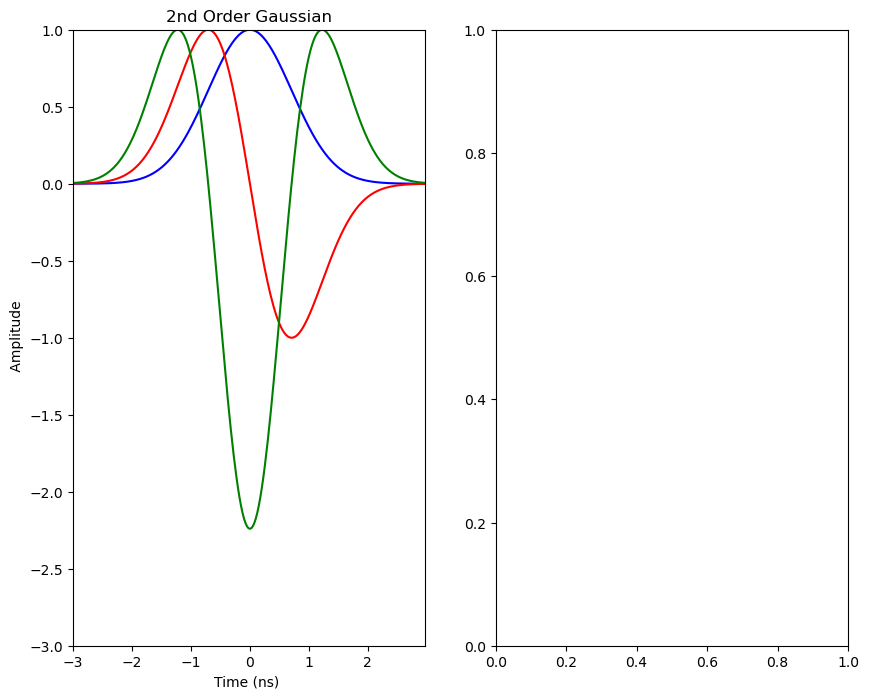

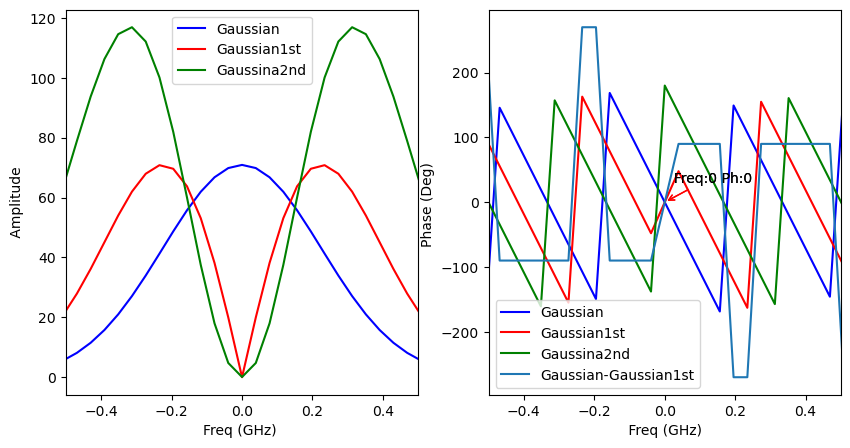

In [26]:
# HALF SIN CODE
import numpy as np
from numpy import sin, exp, cos, log10, pi,angle
import pandas as pd
import matplotlib.pyplot as plt
from bookfuncs.simuParams import  SimuParam
from bookfuncs.spectralfunc import plot1DTparametric,plot1DS,plot1DSparametric,S1d,plot2DTparametric,plot1DSparametricUwrap

par=SimuParam()
par.par
# Time sinals
tf=3e-9
t0=-3e-9 #ar.par.loc['Gau','t0']
t=np.arange(t0,tf,par.par.loc['Gau','dt'])
tau=1e-9
td=0#3e-9

gt=exp(-np.power((t-td)/tau,2))
gt_1Diff=  -2*t/np.power(tau,2)*exp(-np.power((t-td)/tau,2)) #np.diff(gt) 
gt_1Diff= gt_1Diff/np.max(gt_1Diff) 
gt_2Diff=  -2/np.power(tau,2)*(1-2*np.power(t,2)/np.power(tau,2))*exp(-np.power((t-td)/tau,2))     
gt_2Diff= gt_2Diff/np.max(gt_2Diff)  


fig1,axt=plt.subplots(1,2)
fig1.set_size_inches((10,8))
plot1DTparametric(axt,t,(0,[t.min()/1e-9,t.max()/1e-9],[-2,1],gt,"Gaussian",'b','-'))
plot1DTparametric(axt,t,(0,[t.min()/1e-9,t.max()/1e-9],[-2,1],gt_1Diff,"First Order Gaussian",'r','-'))
plot1DTparametric(axt,t,(0,[t.min()/1e-9,t.max()/1e-9],[-3,1],gt_2Diff,"2nd Order Gaussian",'g','-'))

Nfft=1025 # FFT points
Gs=S1d(gt,Nfft,par.par.loc['HSinP','Fs']) # Frequency Domain Signal
GsDiff=S1d(gt_1Diff,Nfft,par.par.loc['HSinP','Fs']) # Frequency Domain Signal
Gs2Diff=S1d(gt_2Diff,Nfft,par.par.loc['HSinP','Fs']) # Frequency Domain Signal

fig2,axf=plt.subplots(1,2)
fig2.set_size_inches((10,5))
plot1DSparametric(axf,Gs['f'],0.5,(0,Gs['S'],'b','-'),(0,GsDiff['S'],'r','-'),(0,Gs2Diff['S'],'g','-'))
angleDiff=180/pi*(np.angle(GsDiff['S'])-np.angle(Gs['S']))
axf[1].plot(GsDiff['f']/1e9,angleDiff)
axf[0].legend(['Gaussian', 'Gaussian1st','Gaussina2nd'])
axf[1].legend(['Gaussian', 'Gaussian1st','Gaussina2nd','Gaussian-Gaussian1st'])

ix=np.argmin(abs(Gs['f']-0))
print(ix)
axf[1].annotate("  Freq:"+str(int(Gs['f'][ix]))+" Ph:"+str(int(180/pi*np.angle(Gs['S'][ix]))), xy=(Gs['f'][ix], 180/pi*np.angle(Gs['S'][ix])),
                 xytext=(Gs['f'][ix], 180/pi*np.angle(Gs['S'][ix])+30),arrowprops=dict(arrowstyle='->', color='red'))

axf[1].annotate("  Freq:"+str(int(GsDiff['f'][ix]))+" Ph:"+str(int(180/pi*np.angle(GsDiff['S'][ix]))), xy=(GsDiff['f'][ix], 180/pi*np.angle(GsDiff['S'][ix])),
                 xytext=(GsDiff['f'][ix], 180/pi*np.angle(GsDiff['S'][ix])+30),arrowprops=dict(arrowstyle='->', color='red'))


str(int(180/pi*np.angle(GsDiff['S'][ix])))

In [27]:
# from importlib.metadata import version
# version('nbformat')
!jupyter nbconvert --output-dir='.\assets'   --to html spectralAnalysis.ipynb  

[NbConvertApp] Converting notebook spectralAnalysis.ipynb to html
[NbConvertApp] Writing 2449700 bytes to .\assets\spectralAnalysis.html
